# Exploratory Data Analysis

In [23]:
import pandas as pd
import numpy as np
import pickle
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Read pickle:

In [24]:
movies_df = pd.read_pickle('movies_df.pkl')
movies_genre_df = pd.read_pickle('movies_genre_df.pkl')

In [25]:
movies_df.head(3)

,movie,imdb,metascore,votes,runtime,certificate,year,month,release_date,genre_count,director,title_length,production_budget,director_power,star_power,star_appearances,star_points,worldwide_gross,domestic_gross
0,10 Cloverfield Lane,7.2,76.0,276310,103,PG-13,2016,Jan,2016-01-04,3,Dan Trachtenberg,19,15000000,0.0,2.793540e+07,24,240.00,108286422,72082999
1,10 Things I Hate About You,7.3,70.0,282841,97,PG-13,1999,Mar,1999-03-31,3,Gil Junger,26,13000000,0.0,0.000000e+00,0,628.75,60413950,38177966
2,102 Dalmatians,4.9,35.0,33368,100,G,2000,Nov,2000-11-22,3,Kevin Lima,14,85000000,0.0,5.724807e+07,3,0.00,66941559,66941559


In [26]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              3148 non-null   object        
 1   imdb               3148 non-null   float64       
 2   metascore          3148 non-null   float64       
 3   votes              3148 non-null   int64         
 4   runtime            3148 non-null   int64         
 5   certificate        3148 non-null   object        
 6   year               3148 non-null   int64         
 7   month              3148 non-null   object        
 8   release_date       3148 non-null   datetime64[ns]
 9   genre_count        3148 non-null   int64         
 10  director           3148 non-null   object        
 11  title_length       3148 non-null   int64         
 12  production_budget  3148 non-null   int64         
 13  director_power     3148 non-null   float64       
 14  star_pow

In [27]:
movies_df.columns

Index(['movie', 'imdb', 'metascore', 'votes', 'runtime', 'certificate', 'year',
       'month', 'release_date', 'genre_count', 'director', 'title_length',
       'production_budget', 'director_power', 'star_power', 'star_appearances',
       'star_points', 'worldwide_gross', 'domestic_gross'],
      dtype='object')

Let's reduce features to those that are known prior to movie release:

In [28]:
movies_df = movies_df[['movie', 'production_budget', 'director_power', 'star_power', 'star_appearances', 'star_points', 
                       'release_date', 'year', 'month', 'genre_count', 
                       'certificate', 'runtime', 'title_length', 'director',
                       'domestic_gross']] 

Let's visualize the distribution of our target variable, domestic gross:

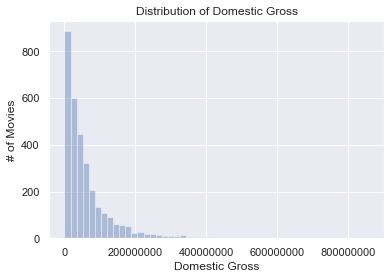

In [29]:
sns.distplot(movies_df['domestic_gross'], kde=False) # alpha=0.2 #hue
plt.title('Distribution of Domestic Gross')
#plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
#plt.xticks(np.arange(0, 500000000, 1000),rotation = 45)
plt.xlabel('Domestic Gross')
plt.ylabel('# of Movies') ;
plt.savefig("output.png")

As expected, most of the movies fall on the left side of the distribute representing low-grossed movies, and the  long right tail demonstrating a few extremely high-grossed movies

/Users/johnlee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:178: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  args=endog)[0] for i in range(1, gridsize)]


''

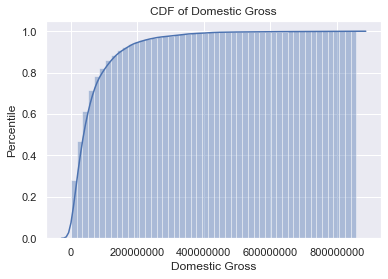

In [30]:
#plt.density(movies_df.domestic_gross, cumulative=True, density=True, bins=30)
kwargs = {'cumulative': True}
sns.distplot(movies_df.domestic_gross, hist_kws=kwargs, kde_kws=kwargs) 
plt.title('CDF of Domestic Gross')
#plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
#plt.xticks(np.arange(0, 500000000, 1000),rotation = 45)
plt.xlabel('Domestic Gross')
plt.ylabel('Percentile') ;
plt.savefig("cdf_gross.png")
;

[Text(0, 0, '')]

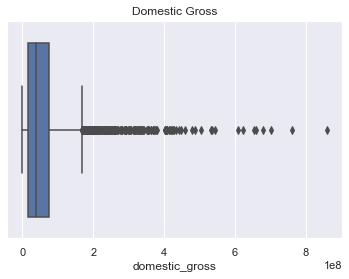

In [31]:
ax = sns.boxplot(y="domestic_gross", data=movies_df, orient='h', color='b')

#month = movies_df.groupby('month').agg(count=('movie', 'count')).reset_index()
#sns.barplot(x="month", y="count", data=month, color='b')

#ax = sns.countplot(x='month', data=movies_df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul',
#                                                'Aug','Sep','Oct','Nov','Dec'], color='b') 

plt.title('Domestic Gross')
#plt.ticklabel_format(style='plain', axis='y')
#plt.ticklabel_format(style='plain', axis='x')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#plt.xticks(np.arange(0, len(movies_df.year), 7),rotation = 45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#plt.xlabel('Year')
#plt.ylabel('Domestic Gross') ;
#plt.savefig("output.png")

Next, let's visualize the relationships between the variables:

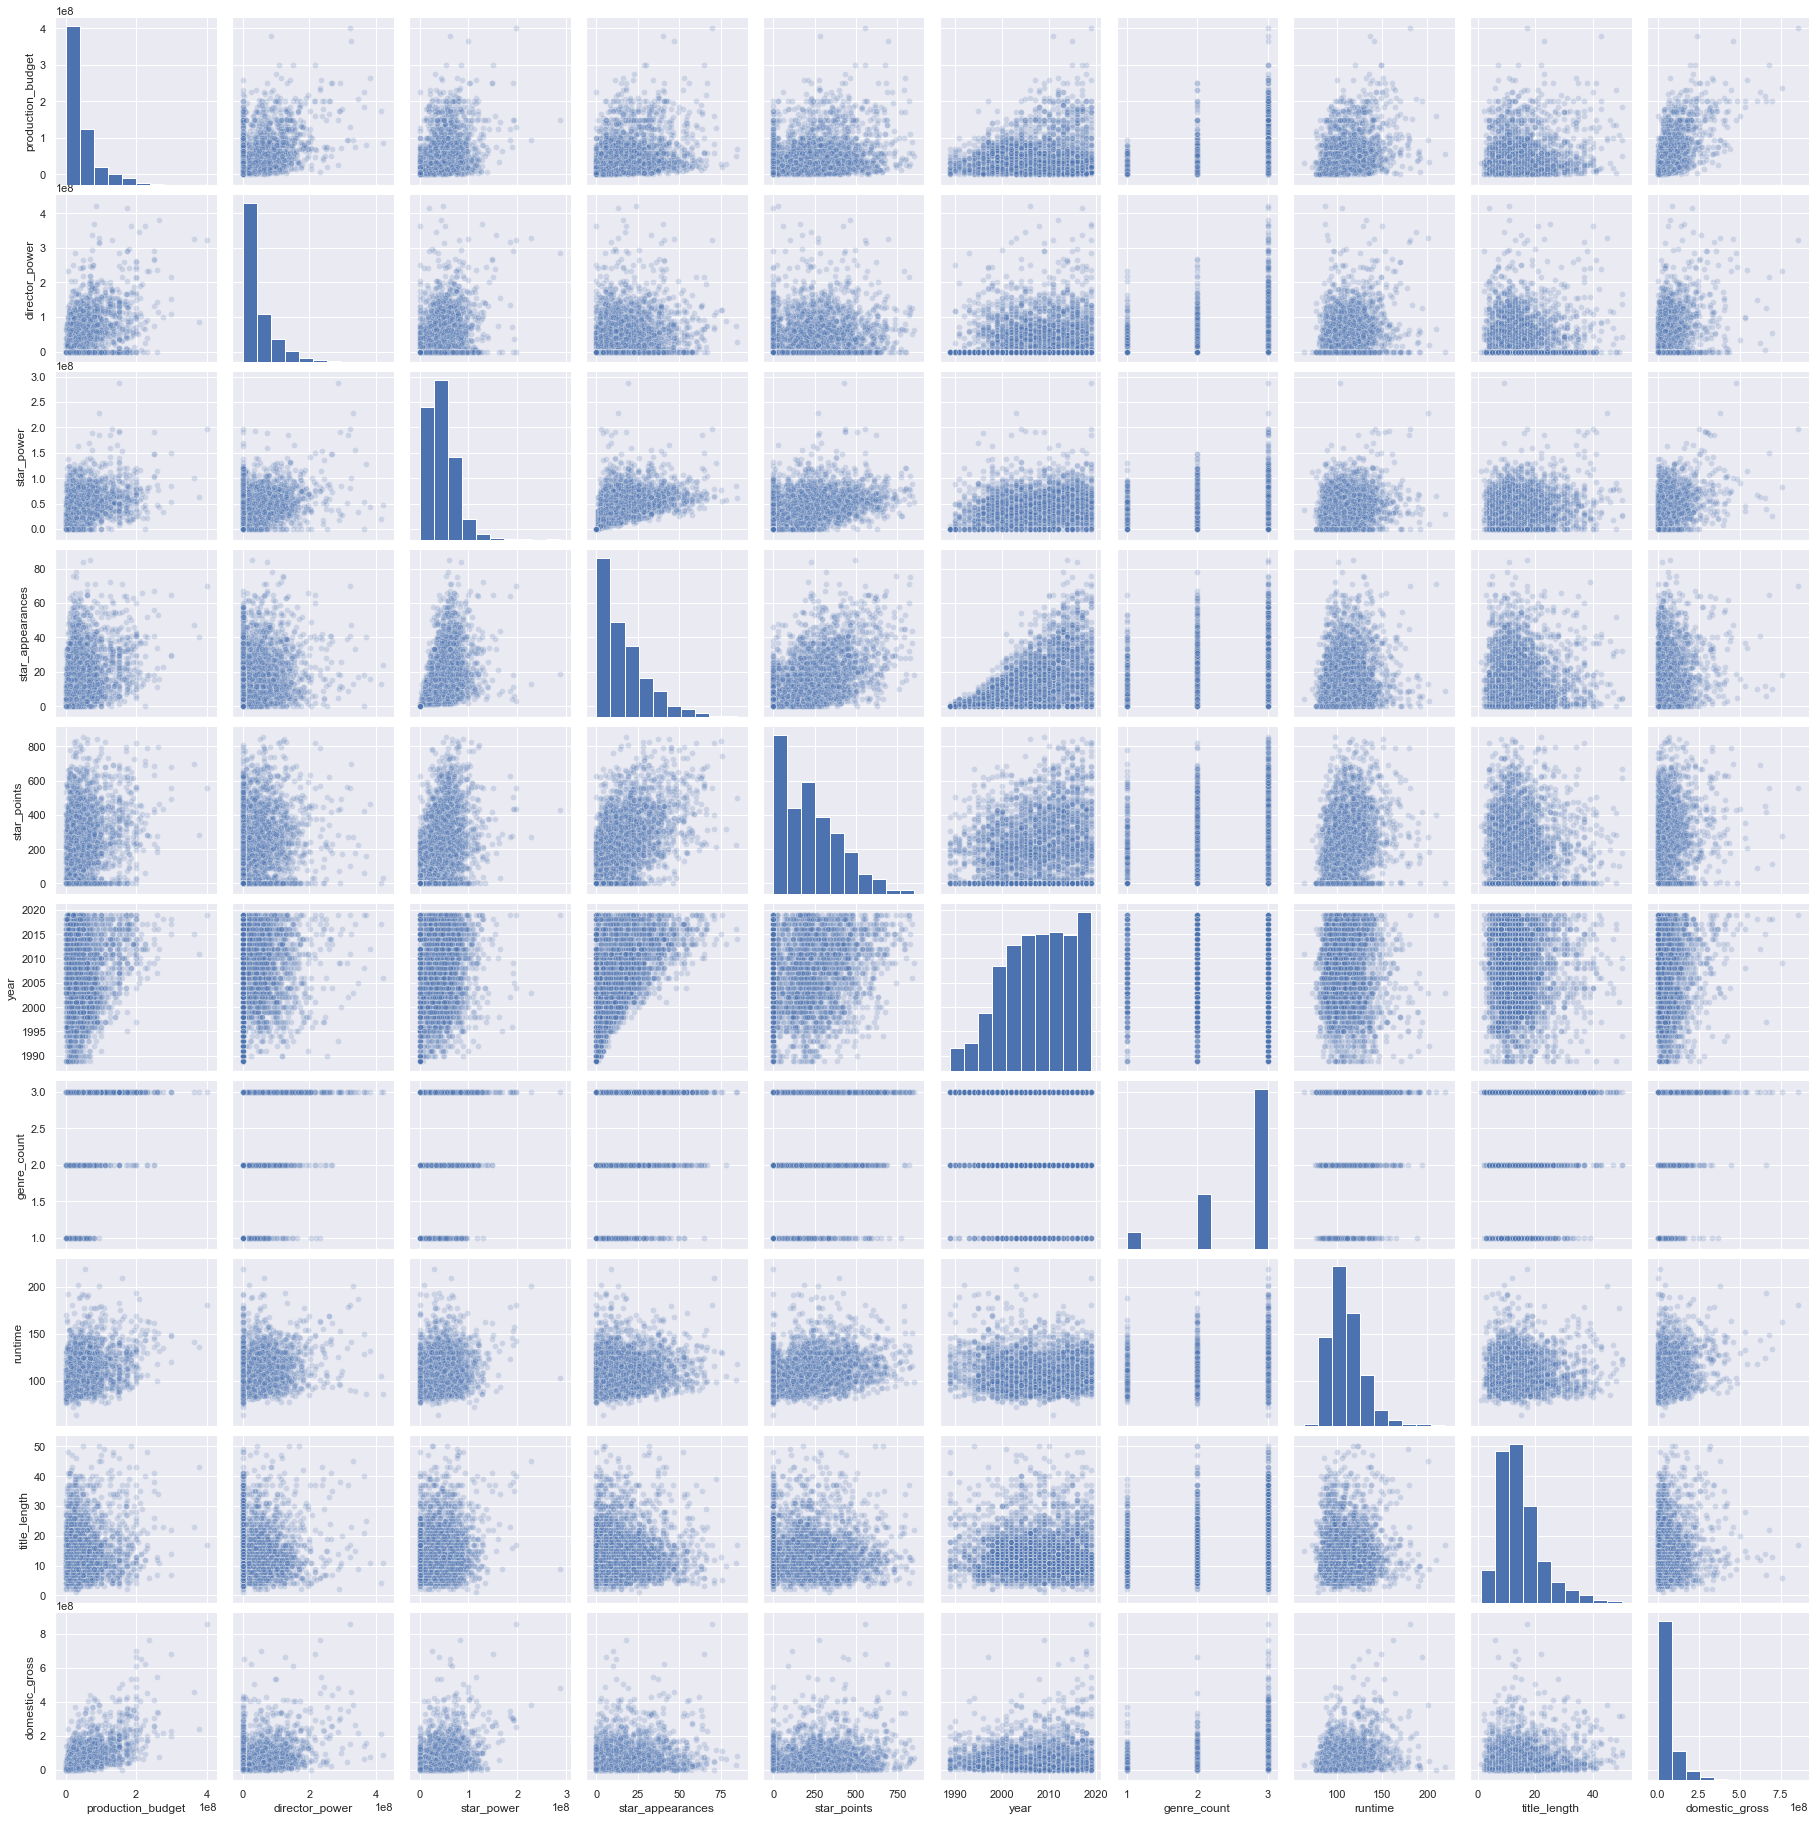

In [32]:
sns.pairplot(movies_df, plot_kws=dict(alpha=0.2)) ;

In [393]:
movies_df.corr()

,imdb,metascore,votes,runtime,year,genre_count,title_length,production_budget,director_power,star_power,star_appearances,star_points,worldwide_gross,domestic_gross
imdb,1.000000,0.746538,0.496871,0.420064,-0.053143,-0.010408,-0.045014,0.030316,0.042216,0.034526,0.067979,0.205801,0.207989,0.212510
metascore,0.746538,1.000000,0.361850,0.300544,0.003258,-0.001112,-0.025636,-0.014394,0.003015,-0.006599,0.030877,0.103843,0.162874,0.180858
votes,0.496871,0.361850,1.000000,0.349179,-0.034951,0.035646,0.045062,0.360824,0.206568,0.170403,0.138596,0.296358,0.569354,0.577413
runtime,0.420064,0.300544,0.349179,1.000000,-0.038377,0.094347,0.008422,0.306156,0.237868,0.179061,0.145949,0.280961,0.247452,0.227187
year,-0.053143,0.003258,-0.034951,-0.038377,1.000000,0.048887,-0.008862,0.110083,0.113881,0.182852,0.482652,0.194810,0.102634,0.015329
genre_count,-0.010408,-0.001112,0.035646,0.094347,0.048887,1.000000,-0.003047,0.252819,0.119570,0.089348,0.079910,0.081489,0.162556,0.131646
title_length,-0.045014,-0.025636,0.045062,0.008422,-0.008862,-0.003047,1.000000,0.144642,0.063423,0.102016,-0.011619,-0.030473,0.152967,0.125659
production_budget,0.030316,-0.014394,0.360824,0.306156,0.110083,0.252819,0.144642,1.000000,0.485132,0.374048,0.334534,0.290974,0.711161,0.629207
director_power,0.042216,0.003015,0.206568,0.237868,0.113881,0.119570,0.063423,0.485132,1.000000,0.279849,0.218359,0.176732,0.391612,0.367463
star_power,0.034526,-0.006599,0.170403,0.179061,0.182852,0.089348,0.102016,0.374048,0.279849,1.000000,0.507739,0.381157,0.327385,0.305825


In [212]:
movies_df.describe()

,production_budget,runtime,year,genre_count,title_length,director_power,star_power,star_appearances,star_points,domestic_gross
count,3.148000e+03,3148.000000,3148.000000,3148.000000,3148.000000,3.148000e+03,3.148000e+03,3148.000000,3148.000000,3.148000e+03
mean,4.612288e+07,109.657560,2007.141995,2.622618,14.476493,4.005259e+07,4.299592e+07,15.835451,222.842125,6.201424e+07
std,4.725777e+07,18.404114,7.338550,0.612773,7.670346,5.580041e+07,2.935777e+07,14.243455,182.750638,7.857046e+07
min,7.000000e+03,63.000000,1989.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.500000e+07,96.000000,2002.000000,2.000000,9.000000,0.000000e+00,2.245866e+07,5.000000,59.416667,1.493663e+07
50%,3.000000e+07,106.000000,2008.000000,3.000000,13.000000,1.605336e+07,4.036625e+07,12.000000,202.125000,3.695830e+07
75%,6.000000e+07,120.000000,2013.000000,3.000000,18.000000,6.410824e+07,5.946892e+07,23.000000,341.062500,7.595034e+07
max,4.000000e+08,219.000000,2019.000000,3.000000,50.000000,4.217853e+08,2.876159e+08,85.000000,852.250000,8.583730e+08


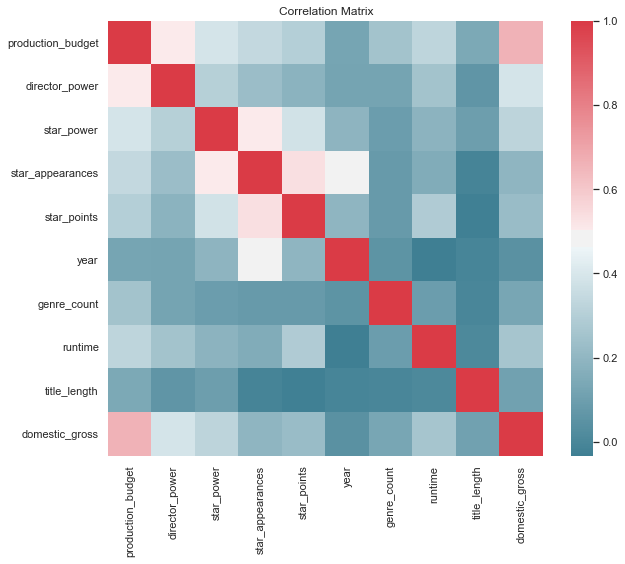

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
corr = movies_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax) 
plt.title('Correlation Matrix') ;

In [215]:
movies_df.head(3)

,movie,production_budget,runtime,release_date,year,month,genre_count,certificate,title_length,director,director_power,star_power,star_appearances,star_points,domestic_gross
0,10 Cloverfield Lane,15000000,103,2016-01-04,2016,Jan,3,PG-13,19,Dan Trachtenberg,0.0,2.793540e+07,24,240.00,72082999
1,10 Things I Hate About You,13000000,97,1999-03-31,1999,Mar,3,PG-13,26,Gil Junger,0.0,0.000000e+00,0,628.75,38177966
2,102 Dalmatians,85000000,100,2000-11-22,2000,Nov,3,G,14,Kevin Lima,0.0,5.724807e+07,3,0.00,66941559


Domestic gross by month:

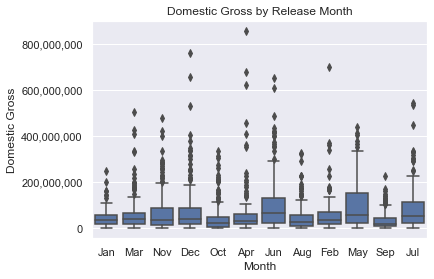

In [267]:
ax = sns.boxplot(x="month", y="domestic_gross", data=movies_df, color='b')

#month = movies_df.groupby('month').agg(count=('movie', 'count')).reset_index()
#sns.barplot(x="month", y="count", data=month, color='b')

#ax = sns.countplot(x='month', data=movies_df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul',
#                                                'Aug','Sep','Oct','Nov','Dec'], color='b') 

plt.title('Domestic Gross by Release Month')
#plt.ticklabel_format(style='plain', axis='y')
#plt.ticklabel_format(style='plain', axis='x')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#plt.xticks(np.arange(0, 500000000, 1000),rotation = 45)
plt.xlabel('Month')
plt.ylabel('Domestic Gross') ;
#plt.savefig("output.png")

Domestic gross by certificate:

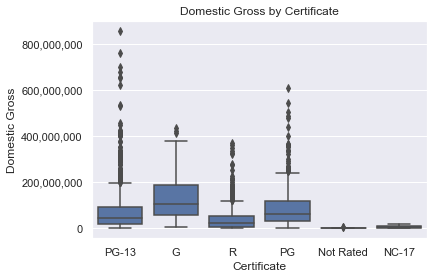

In [268]:
ax = sns.boxplot(x="certificate", y="domestic_gross", data=movies_df, color='b')

#month = movies_df.groupby('month').agg(count=('movie', 'count')).reset_index()
#sns.barplot(x="month", y="count", data=month, color='b')

#ax = sns.countplot(x='month', data=movies_df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul',
#                                                'Aug','Sep','Oct','Nov','Dec'], color='b') 

plt.title('Domestic Gross by Certificate')
#plt.ticklabel_format(style='plain', axis='y')
#plt.ticklabel_format(style='plain', axis='x')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#plt.xticks(np.arange(0, 500000000, 1000),rotation = 45)
plt.xlabel('Certificate')
plt.ylabel('Domestic Gross') ;
#plt.savefig("output.png")

Several extreme outliers are movies with PG-13 rating

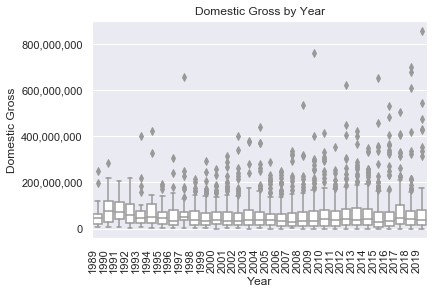

In [341]:
ax = sns.boxplot(x="year", y="domestic_gross", data=movies_df, color='w')

#month = movies_df.groupby('month').agg(count=('movie', 'count')).reset_index()
#sns.barplot(x="month", y="count", data=month, color='b')

#ax = sns.countplot(x='month', data=movies_df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul',
#                                                'Aug','Sep','Oct','Nov','Dec'], color='b') 

plt.title('Domestic Gross by Year')
#plt.ticklabel_format(style='plain', axis='y')
#plt.ticklabel_format(style='plain', axis='x')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#plt.xticks(np.arange(0, len(movies_df.year), 7),rotation = 45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Year')
plt.ylabel('Domestic Gross') ;
#plt.savefig("output.png")

Analyzing by genre (a movie can have multiple genres):

In [330]:
movies_genre_df.head(5)

,movie,imdb,metascore,votes,runtime,certificate,year,month,release_date,genre,genre_count,director,title_length,production_budget,director_power,star_power,star_appearances,star_points,worldwide_gross,domestic_gross
0,10 Cloverfield Lane,7.2,76.0,276310,103,PG-13,2016,Jan,2016-01-04,Drama,3,Dan Trachtenberg,19,15000000,0.0,2.793540e+07,24,240.00,108286422,72082999
1,10 Cloverfield Lane,7.2,76.0,276310,103,PG-13,2016,Jan,2016-01-04,Horror,3,Dan Trachtenberg,19,15000000,0.0,2.793540e+07,24,240.00,108286422,72082999
2,10 Cloverfield Lane,7.2,76.0,276310,103,PG-13,2016,Jan,2016-01-04,Mystery,3,Dan Trachtenberg,19,15000000,0.0,2.793540e+07,24,240.00,108286422,72082999
3,10 Things I Hate About You,7.3,70.0,282841,97,PG-13,1999,Mar,1999-03-31,Comedy,3,Gil Junger,26,13000000,0.0,0.000000e+00,0,628.75,60413950,38177966
4,10 Things I Hate About You,7.3,70.0,282841,97,PG-13,1999,Mar,1999-03-31,Drama,3,Gil Junger,26,13000000,0.0,0.000000e+00,0,628.75,60413950,38177966


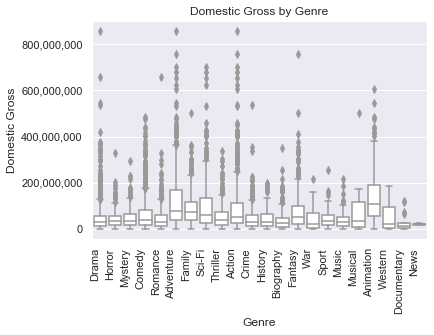

In [348]:
ax = sns.boxplot(x="genre", y="domestic_gross", data=movies_genre_df, color='w')

#month = movies_df.groupby('month').agg(count=('movie', 'count')).reset_index()
#sns.barplot(x="month", y="count", data=month, color='b')

#ax = sns.countplot(x='month', data=movies_df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul',
#                                                'Aug','Sep','Oct','Nov','Dec'], color='b') 

plt.title('Domestic Gross by Genre')
#plt.ticklabel_format(style='plain', axis='y')
#plt.ticklabel_format(style='plain', axis='x')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#plt.xticks(np.arange(0, 500000000, 1000),rotation = 45)
plt.xlabel('Genre')
plt.ylabel('Domestic Gross') ;
#plt.savefig("output.png")

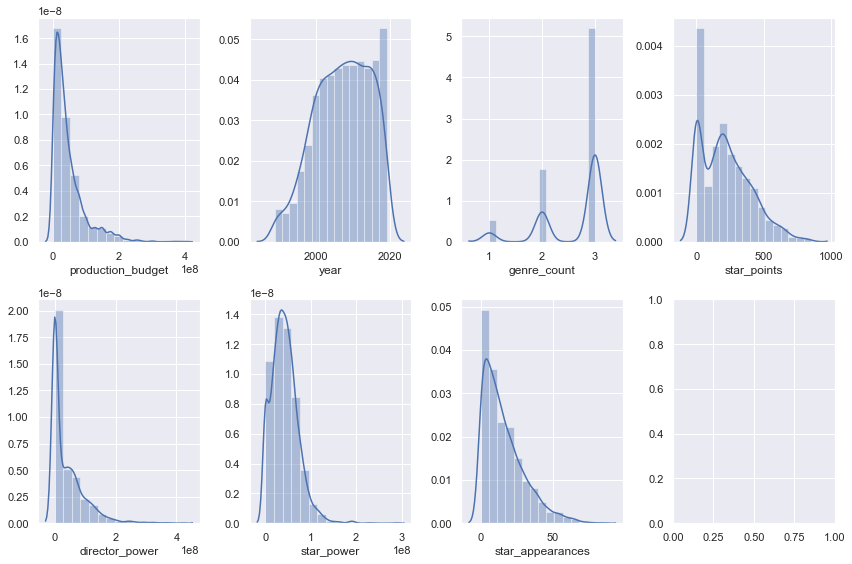

In [324]:
fig, axes = plt.subplots(2, 4)
fig.set_size_inches(12, 8)

m1 = sns.distplot(movies_df.production_budget, bins=15, ax=axes[0, 0])
m2 = sns.distplot(movies_df.year, bins=15, ax=axes[0, 1])
m3 = sns.distplot(movies_df.genre_count, bins=15, ax=axes[0, 2])
m4 = sns.distplot(movies_df.director_power, bins=15, ax=axes[1, 0])
m5 = sns.distplot(movies_df.star_power, bins=15, ax=axes[1, 1])
m6 = sns.distplot(movies_df.star_appearances, bins=15, ax=axes[1, 2])
m7 = sns.distplot(movies_df.star_points, bins=15, ax=axes[0, 3])

#plt.setp(axes, yticks=[])
plt.tight_layout()

Top 20 grossing movies:

In [292]:
movies_df.sort_values(by='domestic_gross', ascending=False).head(20)

,movie,production_budget,runtime,release_date,year,month,genre_count,certificate,title_length,director,director_power,star_power,star_appearances,star_points,domestic_gross
248,Avengers: Endgame,400000000,181,2019-04-23,2019,Apr,3,PG-13,17,Anthony Russo,3.224847e+08,1.972372e+08,70,555.600000,858373000
246,Avatar,237000000,162,2009-12-17,2009,Dec,3,PG-13,6,James Cameron,2.327233e+08,8.200906e+07,18,275.500000,760507625
350,Black Panther,200000000,134,2018-02-13,2018,Feb,3,PG-13,13,Ryan Coogler,5.356643e+07,2.553239e+07,10,111.250000,700059566
249,Avengers: Infinity War,300000000,149,2018-04-25,2018,Apr,3,PG-13,22,Anthony Russo,2.155855e+08,1.497464e+08,65,555.600000,678815482
2884,Titanic,200000000,194,1997-12-19,1997,Dec,2,PG-13,7,James Cameron,1.260631e+08,3.969910e+07,6,419.250000,659363944
1246,Jurassic World,215000000,124,2015-06-09,2015,Jun,3,PG-13,14,Colin Trevorrow,4.010957e+06,6.158965e+07,12,453.250000,652270625
2254,The Avengers,225000000,143,2012-04-25,2012,Apr,3,PG-13,12,Joss Whedon,2.551452e+07,6.276003e+07,41,690.500000,623357910
1155,Incredibles 2,200000000,118,2018-06-15,2018,Jun,3,PG,13,Brad Bird,1.496691e+08,6.637404e+07,10,88.250000,608581744
2577,The Lion King,260000000,118,2019-07-11,2019,Jul,3,PG,13,Jon Favreau,2.349948e+08,1.147399e+08,34,209.250000,543638043
2344,The Dark Knight,185000000,152,2008-07-18,2008,Jul,3,PG-13,15,Christopher Nolan,9.684551e+07,4.433721e+07,37,355.000000,535234033


Several key observations based on the top 20 list:  
* More than half grossed at least 500MM USD  
* 19 of the 20 films had production budget of at least 100MM USD
* 19 of the 20 films were rated PG or PG-13   
* Several are associated with franchises / major production studios
* Six films were from three directors (Anthony Russo, James Cameron and Christopher Nolan)

In [293]:
movies_df.domestic_gross.describe()

count    3.148000e+03
mean     6.201424e+07
std      7.857046e+07
min      0.000000e+00
25%      1.493663e+07
50%      3.695830e+07
75%      7.595034e+07
max      8.583730e+08
Name: domestic_gross, dtype: float64

In [12]:
percentiles = [0.01, 0.10, 0.50, 0.90, 0.95, 0.995, 0.999, 0.9999]

percentile_values = [movies_df.domestic_gross.quantile(percentile) for percentile in percentiles]        

for percentile in percentile_values:
    print(percentile)

1504.0000000000077
4019905.8000000007
36958295.0
146499373.2000001
206714757.39999986
443058152.77999914
675956105.91401
827574766.487465


We're going to remove some of these extreme outliers - in particular, movies in the 99.5th percentile and higher (16 movies grossing above ~$443MM):

In [13]:
q = movies_df['domestic_gross'].quantile(0.995)
movies_df = movies_df[movies_df['domestic_gross'] < q]
q = movies_genre_df['domestic_gross'].quantile(0.995)
movies_genre_df = movies_genre_df[movies_genre_df['domestic_gross'] < q]

In [14]:
movies_df.to_pickle('movies_df_no_outliers.pkl')
movies_genre_df.to_pickle('movies_genre_df_no_outliers.pkl')

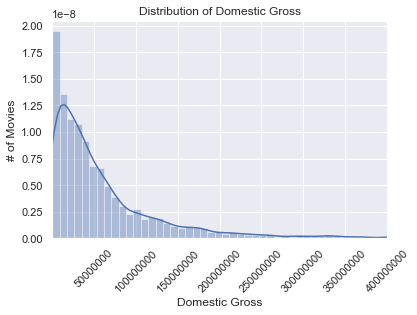

In [17]:
ax = sns.distplot(movies_df['domestic_gross'], kde=True) # alpha=0.2 #hue
plt.title('Distribution of Domestic Gross')
#plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
#ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
plt.xticks(rotation = 45)
plt.xlabel('Domestic Gross')
plt.ylabel('# of Movies') ;
plt.xlim(1, 400000000)
plt.savefig("distribution_kde.png")

In [22]:
movies_df.domestic_gross.mean()

59289146.08971903